In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
missing_data = '-'

In [2]:
db = pd.read_csv('ODI-2018_clean.csv')
db

,timestamp,programme,ML,IR,stat,DB,gender,chocolate,neighbours,stand,money,random,good(1),good(2),y_birth,m_birth,d_birth,h_bed,m_bed
0,4/5/2018 11:22:56,QRM,no,no,yes,no,male,neither,-,no,0,7,Productive,Good sleep,1994,10,12,0,0
1,4/5/2018 11:23:04,CS,no,no,-,yes,male,ignorant,-,yes,-,-,got a 8.5,got 2 8.5s,1993,6,8,0,0
2,4/5/2018 11:23:06,BA,yes,yes,no,yes,male,neither,5,no,-,6,Food,Sport,1992,12,25,19,9
3,4/5/2018 11:23:50,BA,yes,yes,yes,yes,male,ignorant,2,no,0,8,-,-,1995,1,2,0,0
4,4/5/2018 11:23:59,CS,no,no,no,yes,male,ignorant,6,no,0,8,sleep,beer,1994,9,1,-,-
5,4/5/2018 11:24:34,Drug Discovery and Safety,no,no,yes,no,male,fat,4,no,100,-,Chocolate,Doing nothing,1994,8,17,0,0
6,4/5/2018 11:25:25,CS,yes,yes,yes,no,male,neither,5,no,1,-,Chocolate,More chocolate,1993,9,27,9,0
7,4/5/2018 11:25:25,CLS,no,no,yes,yes,male,fat,5,yes,0,3,Sunshine,Friends,1994,5,14,0,0
8,4/5/2018 11:25:36,EOR,no,no,yes,no,male,neither,2,no,0,-,Sun,Rain,1931,11,4,0,0
9,4/5/2018 11:25:51,Bioinformatics,yes,yes,-,yes,male,slim,7,no,0,5,Free time,More free time,1993,8,19,1,0


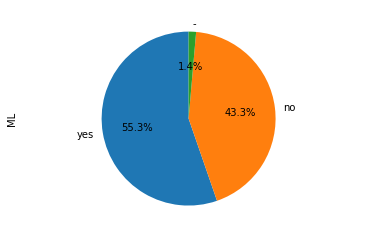

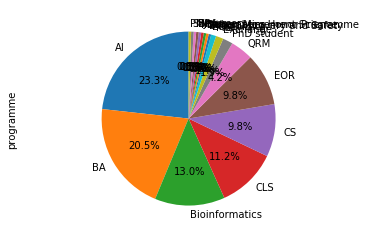

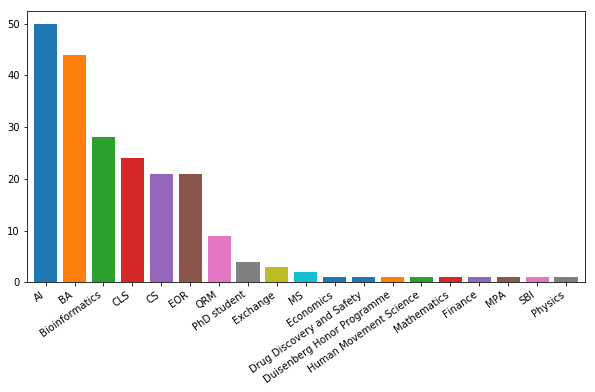

In [29]:
plt.figure()
plt.axis("equal")
db['ML'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, legend=False)
plt.show()

programmes = db.programme[db.programme != missing_data]

plt.figure()
plt.axis("equal")
programmes.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, legend=False)
plt.show()

plt.figure(figsize=(10,5))
ax = programmes.value_counts().plot(kind='bar', width=0.8)
plt.xticks(ax.get_xticks(), rotation=35, ha='right')
plt.show()

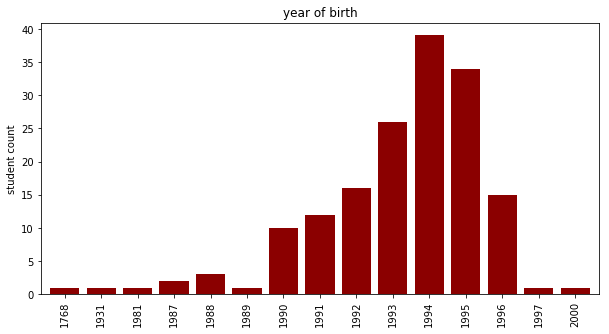

In [14]:
plt.figure(figsize=(10,5))
years = db.y_birth[db.y_birth != missing_data]
hist_years = years.value_counts().sort_index()
ax = hist_years.plot(kind='bar', width=0.8, color='darkred', title='year of birth')
ax.set_ylabel('student count')
plt.show()

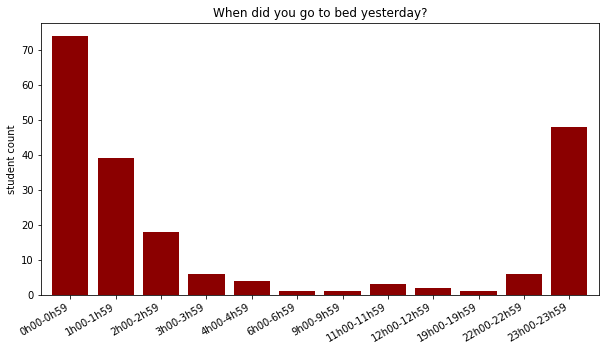

In [22]:
plt.figure(figsize=(10,5))
hours = db.h_bed[db.h_bed != missing_data].astype('float')
hist_hours = hours.value_counts().sort_index()
ax = hist_hours.plot(kind='bar', width=0.8, color='darkred', title='When did you go to bed yesterday?')
ax.set_ylabel('student count')
ax.set_xticklabels(['0h00-0h59','1h00-1h59','2h00-2h59','3h00-3h59','4h00-4h59','6h00-6h59','9h00-9h59','11h00-11h59','12h00-12h59','19h00-19h59','22h00-22h59','23h00-23h59'], rotation=30, ha='right')
plt.show()